In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import gensim
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api



In [3]:
data = pd.read_csv('singapore_airlines_reviews.csv')

In [4]:
data.head()

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0


In [5]:
data.shape

(10000, 7)

In [6]:
data.isna().sum()

published_date        0
published_platform    0
rating                0
type                  0
text                  0
title                 1
helpful_votes         0
dtype: int64

In [7]:
data[data.title.isna()]

,published_date,published_platform,rating,type,text,title,helpful_votes
3918,2019-09-01T04:18:02-04:00,Desktop,2,review,Very rude help desk of Singapore airlines at S...,NaN,1


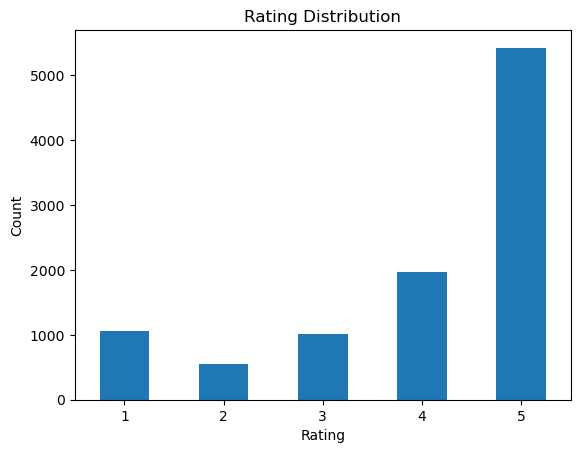

In [21]:
data.rating.value_counts().sort_index().plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

In [22]:
data.rating = data.rating.apply(lambda x: 1 if x > 3 else 0)
data.rating

0       0
1       1
2       0
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: rating, Length: 10000, dtype: int64

In [23]:
data.rating.value_counts()

rating
1    7391
0    2609
Name: count, dtype: int64